In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/nyc_driver.csv")
df

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
0,5675820,CDR,01/21/2016,Denied,06/01/2016,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
1,5676756,CDR,01/26/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
2,5681259,HDR,02/22/2016,Denied,06/14/2016,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
3,5681326,CDR,02/22/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
4,5681690,CDR,02/23/2016,Denied,04/29/2016,Complete,Complete,Complete,Complete,Needed,Not Applicable,07/06/2016 06:11:29 PM
5,5682613,CDR,02/28/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
6,5682927,CDR,03/01/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
7,5683071,CDR,03/01/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
8,5683211,CDR,03/02/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM
9,5684390,CDR,03/07/2016,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,07/06/2016 06:11:29 PM


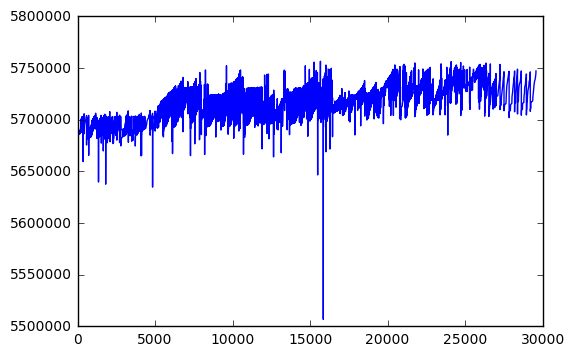

In [4]:
# intesting to note that there's a dip in the app no. Could this be someone re-applying? (They have an old application number.)
plt.plot(df['App No'])
plt.show()

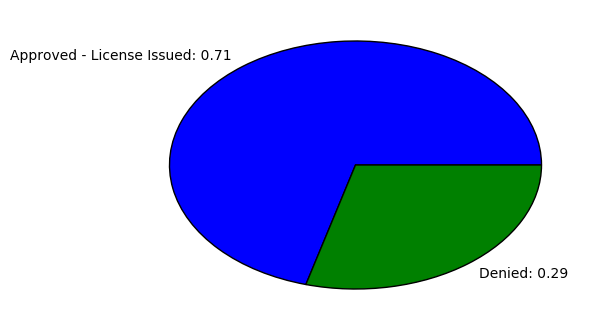

In [87]:
# let's look at status of drivers
# pd.unique(df['Status'])

row_count = len(df)
status_count = df['Status'].value_counts().get_values()

values = [status_count[0] / row_count, status_count[1] / row_count] 
labels = df['Status'].value_counts().keys()
labels_with_values = [x + ': ' + str(np.round(values[i], decimals=2)) for i, x in enumerate(labels)]

plt.pie(values, labels=labels_with_values)
plt.show()

[]

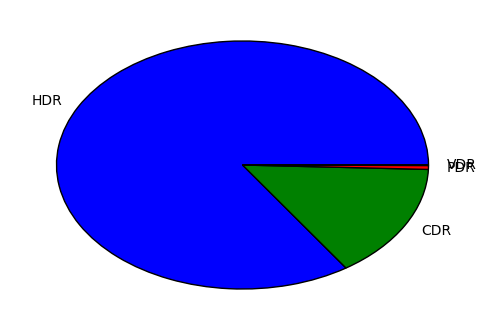

In [8]:
# find the distribution of license types

licenses = df['Type']

val = licenses.value_counts().get_values()
keys = licenses.value_counts().keys()
plt.pie(val, labels=keys)
plt.plot()


In [9]:
license_no_drug_test = np.where((df["Status"] == "Approved - License Issued") & ~(df["Drug Test"] == "Complete"))
print("{} drivers got their license without passing the drug test. That's less than {}%.".format(len(license_no_drug_test[0]), np.around(len(license_no_drug_test[0]) / row_count * 100,decimals=2)))

113 drivers got their license without passing the drug test. That's less than 0.38%.


In [76]:
#TODO
# let's look at application volume over month. How to get that?
# how to add the percentage in the pie chart labels above?
# how would we tranform these pie charts to bar charts?

In [52]:
# date format '01/21/2016'
int(df['App Date'][0].split('/')[0]) # this returns the month

# the obvious way to do it, but it's slow. this is very much the python way to do it.
# you would use this if you don't have a dataframe already
# this is using a list comprehension
# df['Month'] = pd.Series([x.split('/')[0] for x in df['App Date']])

# another way — second best option
# df['Month'] = df['App Date'].map(lambda x: x.split('/')[0])

# the faster way to do it
# these are native pandas functions! it's the fastest route
df['Month'] = df['App Date'].str.split('/').str.get(0)
df['Year'] = df['App Date'].map(lambda x: x.split('/')[2])


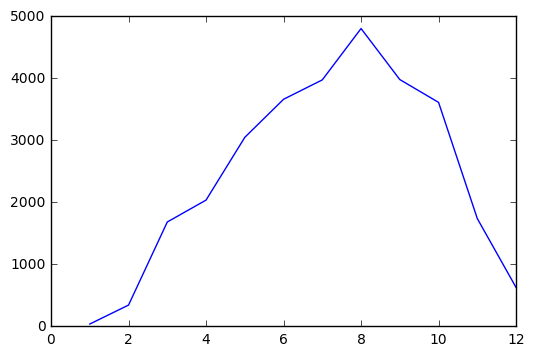

In [76]:
months = df['Month'].value_counts().sort_index()
plt.plot(months)
plt.show()